# Credit Cards Spendings
#### Wirdin Rivera
##### Source: My bank's movements
##### Period of time: From May 1st to August 1st 2023

### Import Files

In [381]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

# Current directory
directory = os.getcwd()

# Credit Card 1 - Data sets from May 1st to August 1st 2023
cc1_may = pd.read_csv(directory + "\\credit_card_may.csv")
cc1_june = pd.read_csv(directory + "\\credit_card_june.csv")
cc1_july = pd.read_csv(directory + "\\credit_card_july.csv")

# Credit Card 2 - Data sets from May 1st to August 1st 2023
cc2 = pd.read_csv(directory + "\\credit_card2_may_august.csv")

### Put the Credit Card 1 (cc1) files in one since they all have the same format

In [382]:
cc1 = pd.concat([cc1_may, cc1_june, cc1_july], ignore_index=True)

### Inspect Files

In [383]:
cc1.head()

,Fecha Posteo,Descripción Corta,Monto Transacción,No. Referencia,No. Serial,Descripción
0,31-may,CR,1500.00,43836,NaN,SERVICENTRO VILLAR LAN SANTO DOMINGO DOM
1,31-may,CR,600.00,89163,NaN,MY STYLE SANTO DOMINGO DOM
2,30-may,CR,9510.14,91269,NaN,BARCELO.COM PALMA DE MALL ESP
3,30-may,CR,300.00,99797,NaN,HELADOS BON SIRENA VIL SANTO DOMINGO DOM
4,30-may,CR,150.00,22885,NaN,HELADOS BON SIRENA VIL SANTO DOMINGO DOM


In [384]:
cc2.head()

,TRANSACCION,REFERENCIA,DESCRIPCION,MONTO,Unnamed: 4
0,02/08/2023,VT232140104015730000002,UBER *EATS HELP.UBER.COM NL,- 810 DOP,
1,25/07/2023,VT232060105019900000227,HIPER OLE SABANA PERD SANTO DOMINGO DO,- 172 DOP,
2,24/07/2023,VT232050102019580000126,LA SIRENA VILLA MELLA SANTO DOMINGO DO,- 78 DOP,
3,24/07/2023,VT232050102019610000165,SM BRAVO CHARLES SANTO DOMINGO DO,- 2696 DOP,
4,24/07/2023,VT232030103020760000101,MINIMARKET MT PERALVILLO DO,- 250 DOP,


In [385]:
cc1.tail()

,Fecha Posteo,Descripción Corta,Monto Transacción,No. Referencia,No. Serial,Descripción
117,6-jul,CR,295.0,65006,NaN,LA SIRENA VILLA MELLA SANTO DOMINGO DOM
118,6-jul,CR,1000.0,44840,NaN,TOTAL LOS PINOS SANTO DOMINGO DOM
119,1-jul,CR,512.0,69213,NaN,KYROS SANTO DOMINGO DOM
120,24-jul,DB,2730.0,0,NaN,Pago Via App
121,20-jul,DB,47400.0,0,NaN,Pago Via App


In [386]:
cc2.tail()

,TRANSACCION,REFERENCIA,DESCRIPCION,MONTO,Unnamed: 4
69,05/05/2023,VT231250131000450000119,PROMO AVANCE SEMANA SA,+ 62.5 DOP,
70,05/05/2023,VT231250131000450000120,PROMO AVANCE SEMANA SA,+ 62.5 DOP,
71,04/05/2023,VT231240134000300000056,PROMO AVANCE SEMANA SA,+ 62.5 DOP,
72,04/05/2023,VT231240134000300000057,PROMO AVANCE SEMANA SA,+ 62.5 DOP,
73,03/05/2023,VT231230103019000000125,APPLEBEES DTC SANTO DOMINGO DO,- 1795 DOP,


In [387]:
cc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fecha Posteo       122 non-null    object 
 1   Descripción Corta  122 non-null    object 
 2   Monto Transacción  122 non-null    float64
 3   No. Referencia     122 non-null    int64  
 4   No. Serial         0 non-null      float64
 5   Descripción        122 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 5.8+ KB


In [388]:
cc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TRANSACCION  74 non-null     object
 1   REFERENCIA   74 non-null     object
 2   DESCRIPCION  74 non-null     object
 3   MONTO        74 non-null     object
 4   Unnamed: 4   74 non-null     object
dtypes: object(5)
memory usage: 3.0+ KB


### In order to start the analysis, both data sets need to be together, however, there are some things that need to be fixed before that:
* Different date format
* Credit Card 2's Dataset has the wrong dtype in Amount (#3 column)
* Useless columns
* Columns language

### Dropping useless columns

In [389]:
cc1.drop(columns=["No. Serial", "No. Referencia"], inplace=True)
cc2.drop(columns=["Unnamed: 4", "REFERENCIA"], inplace= True)

### Changing language of columns' names

In [390]:
cc1_english = {
    "Fecha Posteo" : "Date",
    "Descripción Corta" : "Income/Expense",
    "Monto Transacción" : "Amount",
    "Descripción" : "Description"
}

cc2_english = {
    "TRANSACCION" : "Date",
    "DESCRIPCION" : "Description",
    "MONTO" : "Amount(DOP)"
}

cc1.rename(columns=cc1_english, inplace=True)
cc2.rename(columns=cc2_english, inplace=True)

## Fixes on Credit Card 2
* Amount format
* Columns order
* Debit transactions since is not usage for us right now

In [391]:
# Remove debit transactions
cc2 = cc2[~cc2["Amount(DOP)"].str.contains("\+")]

# Remove "-" from the amount and convert to numeric
cc2.loc[:, "Amount(DOP)"] = pd.to_numeric(cc2["Amount(DOP)"].str.replace("[^\d.]", "", regex=True))

# Change column order to match Credit Card 1's
cc2 = cc2[["Date", "Amount(DOP)", "Description"]]

C:\Users\wrr20\AppData\Local\Temp\ipykernel_11460\3813927687.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  cc2.loc[:, "Amount(DOP)"] = pd.to_numeric(cc2["Amount(DOP)"].str.replace("[^\d.]", "", regex=True))


## Fixes on Credit Card 1
* Date format
* Debit transations since is not usage for us right now
* Debit/Expenses column since it's meaningless

In [392]:
# Change amount column to match Credit Card 2's
cc1.rename(columns={"Amount" : "Amount(DOP)"}, inplace=True)

# Remove debit transactions
cc1 = cc1[~cc1["Income/Expense"].str.contains("DB")]

# Remove Income/Expense column since it's not usage to us
cc1 = cc1.drop(columns=["Income/Expense"])

# Fix date format to dd/mm
cc1.loc[:, "Date"] = pd.to_datetime(cc1["Date"], format="%d-%b").dt.strftime("%d/%m/%Y")

## Put the two datasets together

In [393]:
cc_expenses = pd.concat([cc1, cc2], axis=0, ignore_index=True)

In [394]:
cc_expenses.head()

,Date,Amount(DOP),Description
0,31/05/1900,1500.00,SERVICENTRO VILLAR LAN SANTO DOMINGO DOM
1,31/05/1900,600.00,MY STYLE SANTO DOMINGO DOM
2,30/05/1900,9510.14,BARCELO.COM PALMA DE MALL ESP
3,30/05/1900,300.00,HELADOS BON SIRENA VIL SANTO DOMINGO DOM
4,30/05/1900,150.00,HELADOS BON SIRENA VIL SANTO DOMINGO DOM


In [395]:
cc_expenses.tail()

,Date,Amount(DOP),Description
170,08/05/2023,1500.00,SUPER TIENDA ENZE SANTO DOMINGO DO
171,08/05/2023,829.33,MERCADAL LOS GUARICANO SANTO DOMINGO DO
172,05/05/2023,235.00,CRUNCHYROLL *MEMBERSHI 415-503-9235 CA
173,05/05/2023,107.25,UBER *TRIP HELP.UBER.COM NL
174,03/05/2023,1795.00,APPLEBEES DTC SANTO DOMINGO DO


In [396]:
cc_expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         175 non-null    object 
 1   Amount(DOP)  175 non-null    float64
 2   Description  175 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.2+ KB


In [397]:
cc_expenses.describe().round(2)

,Amount(DOP)
count,175.00
mean,1071.80
std,1959.01
min,3.91
25%,200.00
50%,480.00
75%,867.79
max,14500.00


## The date format for Credit Card 1 lacked the year component, whereas Credit Card 2's format included it. So, let's start by addressing this discrepancy.

In [398]:
cc_expenses["Date"] = cc_expenses["Date"].str.replace("/1900", "/2023")
cc_expenses.loc[:, "Date"] = pd.to_datetime(cc_expenses["Date"], dayfirst=True)

C:\Users\wrr20\AppData\Local\Temp\ipykernel_11460\4033416517.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  cc_expenses.loc[:, "Date"] = pd.to_datetime(cc_expenses["Date"], dayfirst=True)


## Question 1: When did I spend the most?

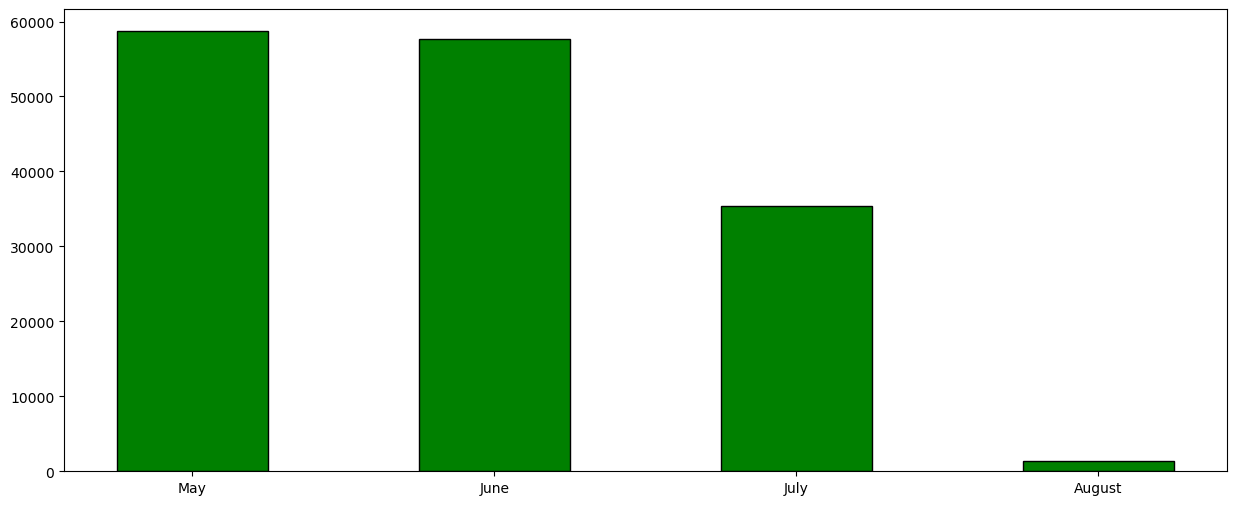

In [399]:
# First, let's remove two payments that didn't came out of my pocket and got the money for it
cc_expenses = cc_expenses[
~(cc_expenses["Description"].str.lower().str.contains("occidental")) & 
~(cc_expenses["Description"].str.lower().str.contains("barcelo.com"))
]

# Extract month
expenses_month = cc_expenses[["Date", "Amount(DOP)"]]
expenses_month["Month"] = cc_expenses["Date"].dt.strftime("%B")

# Group by month
expenses_month = expenses_month.groupby("Month")["Amount(DOP)"].sum().reset_index().sort_values("Month", ascending=False)

# Create bar plot
plt.figure(figsize=(15, 6))
plt.bar(expenses_month["Month"], expenses_month["Amount(DOP)"], color="green", edgecolor="black", width=0.5)

# Show bar
plt.show()


## Question 2: Is there a noticeable pattern or trend in the way I spend?

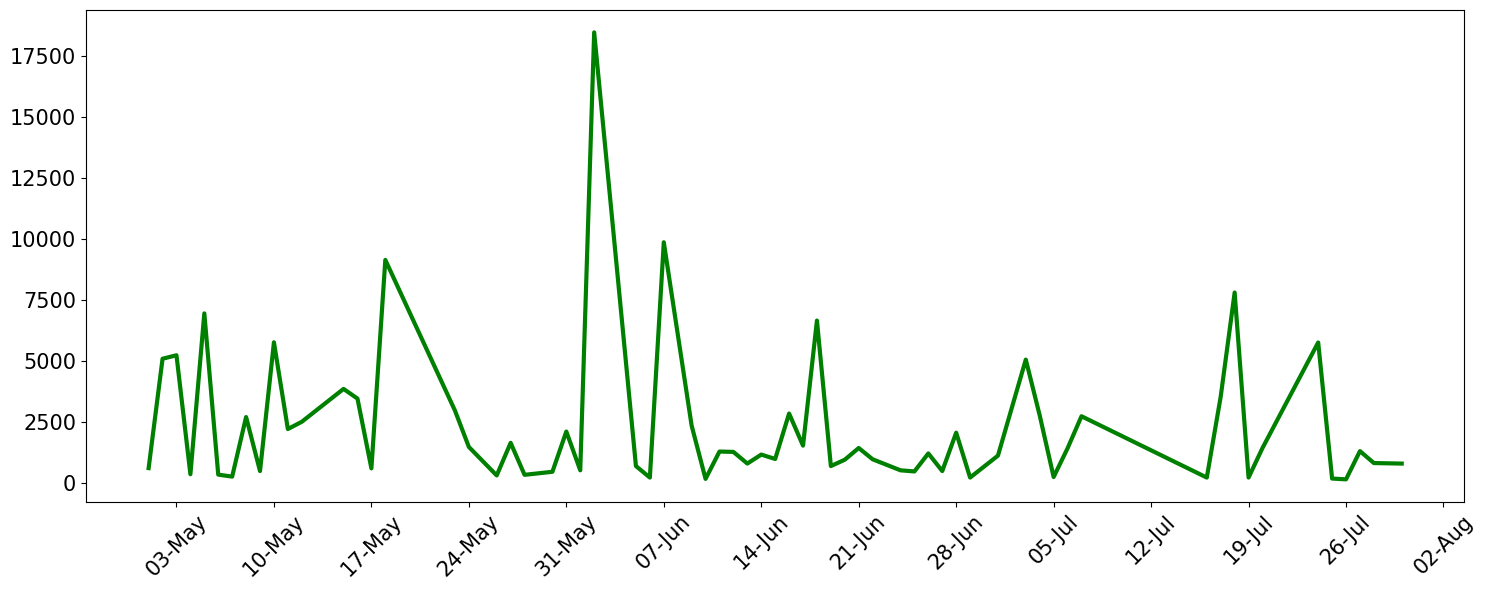

In [400]:
# Group by date
cc_expenses_per_day = cc_expenses.groupby(pd.Grouper(key="Date", freq="D"))["Amount(DOP)"].sum().reset_index()

# Set the date column as the index
cc_expenses_per_day.set_index("Date", inplace=True)

cc_expenses_per_day = cc_expenses_per_day[cc_expenses_per_day.index.month !=8]

# Create a time series plot where the amount is higher than 0
plt.figure(figsize=(15, 6))
plt.plot(cc_expenses_per_day[cc_expenses_per_day["Amount(DOP)"] > 0].index, cc_expenses_per_day[cc_expenses_per_day["Amount(DOP)"] > 0], linewidth=3, color="green")

# Spread the dates a bit more
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d-%b"))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))

# Increase ticks font
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### There seems to be a recurring trend within the data, so let's explore it from an alternative perspective.

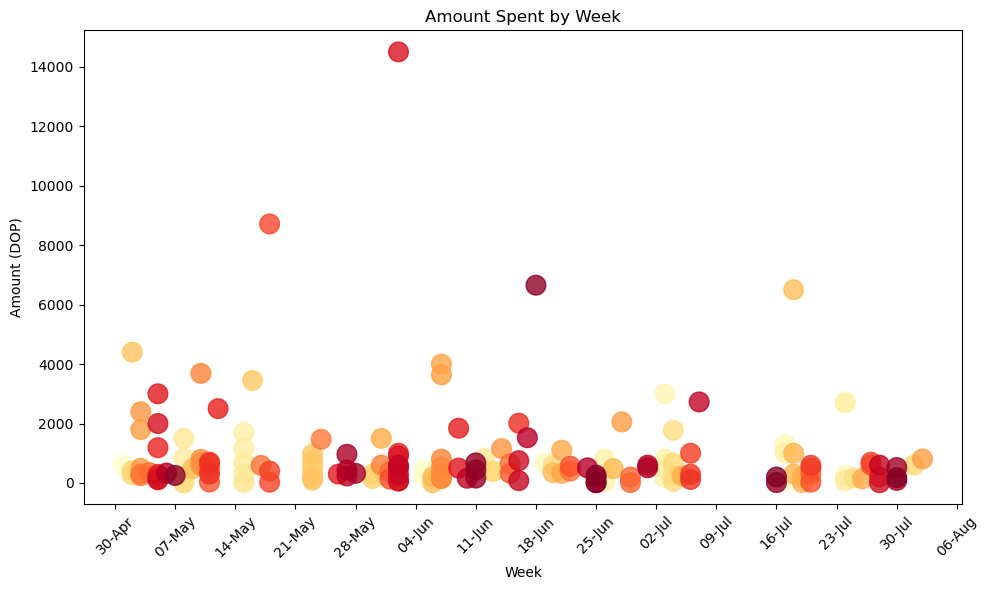

In [401]:
# Extract day of the week and month
expenses_day_month = cc_expenses[["Date", "Amount(DOP)"]]
expenses_day_month["Week Day"] = expenses_day_month["Date"].dt.day_name()
expenses_day_month["Month"] = expenses_day_month["Date"].dt.strftime("%B")

# Sort data
scatter_data = expenses_day_month[expenses_day_month["Amount(DOP)"] > 0].copy()

# Sort values by week day
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
scatter_data["Week Day"] = pd.Categorical(scatter_data["Week Day"], categories=day_order, ordered=True)
scatter_data = scatter_data.sort_values("Week Day")

# Create a scatter plot
plt.figure(figsize=(10, 6))
colors = np.arange(len(scatter_data))
plt.scatter(scatter_data["Date"], scatter_data["Amount(DOP)"], c=colors, cmap="YlOrRd", alpha=0.8, s=200)

# Spread the dates a bit more
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d-%b"))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))

# Customize
plt.title("Amount Spent by Week")
plt.xlabel("Week")
plt.ylabel("Amount (DOP)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


#### Observing the chart above, it's evident that my spending tends to peak around the dates when I receive my job payments – typically the 8th, 15th, and 23rd of each month. This trend could be attributed to the fact that most of my monthly expenses are automatically charged to my credit cards. These include hefty bills like mobile and home internet, which I settle at the start of the month, as well as subscriptions like Spotify, Office, and OneDrive. While these individual expenses accumulate and create a larger figure, the overall total shouldn't be this high.

#### Admittedly, I have an unusual and not-so-great spending pattern. Given the various financial commitments I have each month, not a single peso should be going to waste. However, I somehow manage to surpass the 2K mark on a weekly basis, every single month.

## Question 3: Is there a relation between X day of the week and the amount I spend?

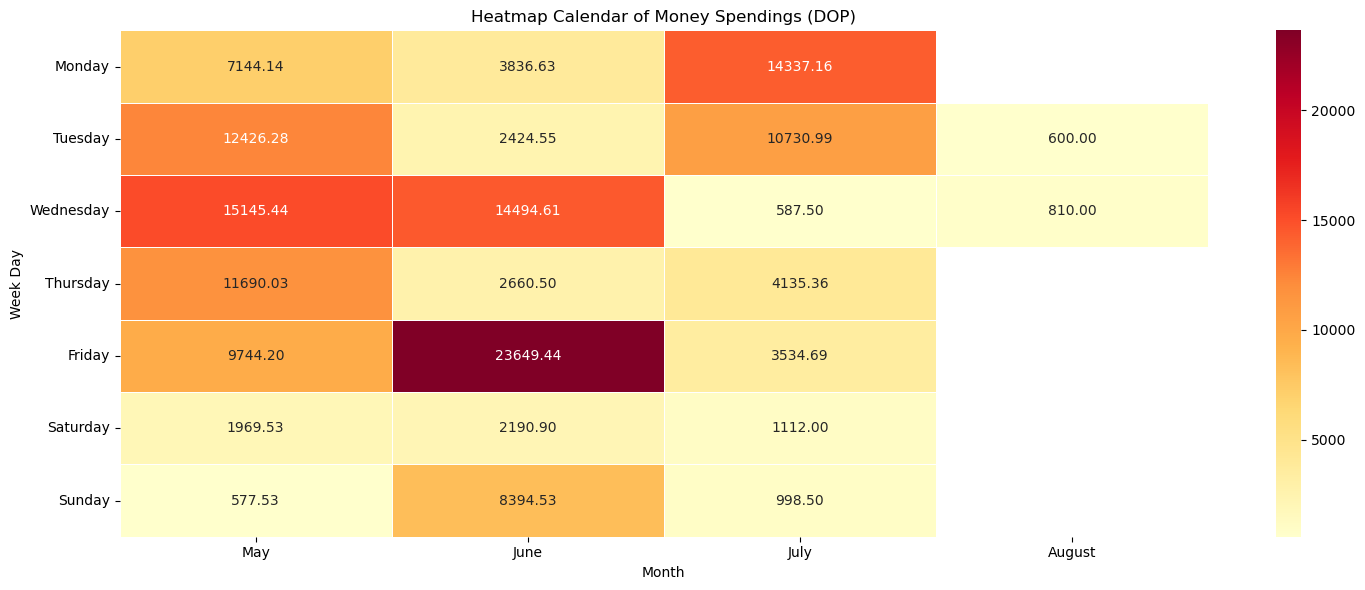

In [402]:
# Sort data
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Set the data for the heatmap
heatmap_data = expenses_day_month.copy()
heatmap_data = heatmap_data.pivot_table(index="Week Day", columns="Month", values="Amount(DOP)", aggfunc="sum")
heatmap_data = heatmap_data.reindex(day_order)

# Reorder columns
heatmap_data = heatmap_data[["May", "June", "July", "August"]]

# Create the calendar
plt.figure(figsize=(15, 6))
sns.heatmap(
    heatmap_data,
    cmap="YlOrRd",
    annot=True,
    fmt=".2f",
    linewidths=0.5
    )

# Add labels
plt.title("Heatmap Calendar of Money Spendings (DOP)")

# Show the plot
plt.tight_layout()
plt.show()

#### Interestingly, my highest spending days occur on weekdays rather than weekends, which is quite surprising given that weekends are typically when I have more free time and could potentially go out. What's even more amusing is that despite the available opportunity, my wife and I were notorious for rarely stepping outside before. However, in May, everything changed when we purchased our first car. Suddenly, the appeal of staying in diminished, and as the chart indicates, it appears that a significant portion of this newfound outdoor enthusiasm was driven by my spending habits.

## Let's confirm that hypothesis.

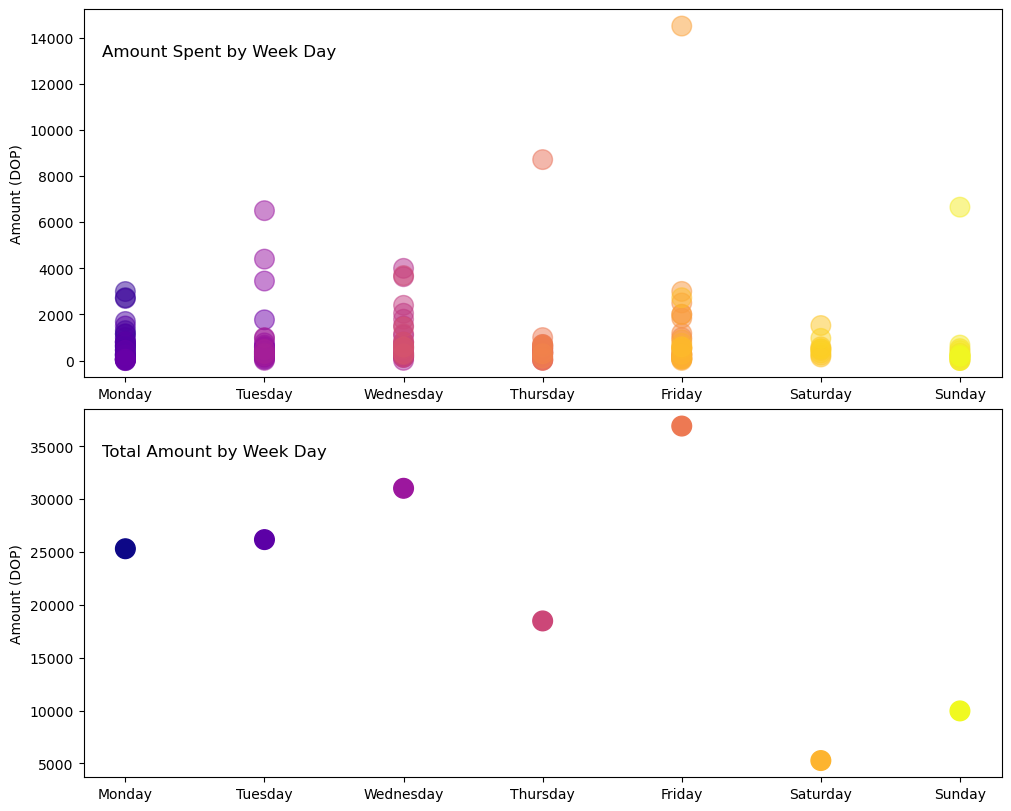

In [403]:
# Sort data
scatter_data = expenses_day_month[expenses_day_month["Amount(DOP)"] > 0].copy()

# Sort values by week day
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
scatter_data["Week Day"] = pd.Categorical(scatter_data["Week Day"], categories=day_order, ordered=True)
scatter_data = scatter_data.sort_values("Week Day")

# Create subplot
fig, axs = plt.subplots(2, 1, figsize=(10, 8), layout="constrained")

# Customize
for ax in axs:
    ax.set_ylabel("Amount (DOP)")

# Create a scatter plot

# First figure
colors = np.arange(len(scatter_data))
ax = axs[0]
ax.scatter(scatter_data["Week Day"], scatter_data["Amount(DOP)"], c=colors, cmap="plasma", alpha=0.5, s=200)

# Set title 1
ax.set_title("Amount Spent by Week Day", loc="left", y=0.85, x=0.02, fontsize="large")

# Second figure
total_amount = scatter_data.copy()
total_amount = total_amount.groupby("Week Day")["Amount(DOP)"].sum().reset_index()
colors = np.arange(len(total_amount))
ax = axs[1]
ax.scatter(total_amount["Week Day"], total_amount["Amount(DOP)"], c=colors, cmap="plasma", s=200)

# Set title 2
ax.set_title("Total Amount by Week Day", loc="left", y=0.85, x=0.02, fontsize="large")

plt.show()

#### The charts confirm the theory – my expenses are significantly higher on weekdays than on weekends. This implies that I often venture out in the evenings, especially after 8 PM, when my workday is over. This pattern makes sense as weekdays can leave me too tired to cook, prompting us to opt for dining out, which in turn leads to various expenditures like gas, food purchases, and other spontaneous expenses that catch our attention.

## Question 4: Where is most of my spending going?

In [404]:
# Let's see the type of transactions I made first
cc_expenses["Description"].unique()

array(['SERVICENTRO VILLAR LAN SANTO DOMINGO DOM',
       'MY STYLE SANTO DOMINGO DOM',
       'HELADOS BON SIRENA VIL SANTO DOMINGO DOM',
       'LA SIRENA VILLA MELLA SANTO DOMINGO DOM',
       'PAGORD NACO SANTO DOMINGO DOM',
       'BM CARGO SAMBIL SANTO DOMINGO DOM',
       'PAPA JOHNS SAMBIL SANTO DOMINGO DOM',
       'PALACIO DEL CINE SAMBI SANTO DOMINGO DOM',
       'HUMMUS SAMBIL SANTO DOMINGO DOM',
       'SM BRAVO CHARLES SANTO DOMINGO DOM',
       'WENDY S 27 DE FEBRERO SANTO DOMINGO DOM',
       'UNICARIBE PP SANTO DOMINGO DOM',
       'ALTICE -APP ECOMM SANTO DOMINGO DOM',
       'SHEIN US SERVICES LLC 0000000000 USA',
       'JADE TERIYAKI MEGAC SANTO DOMINGO DOM',
       'KRISPY KREME TIRADENTE SANTO DOMINGO DOM',
       'EPC*FORTNITE 919-854-0070 LUX',
       'YOKOMO MEGA CENTRO SANTO DOMINGO DOM',
       'POLLOS VICTORINA MEGAC SANTO DOMINGO DOM',
       'JUMBO MEGACENTRO SANTO DOMINGO DOM',
       'TOTAL LOS PINOS SANTO DOMINGO DOM', 'Retiros THS via APP',
       'CO

### Let's put them in their respective category

In [405]:
# Adds a specific category to the "Category" column inside our data frame
def categorize_expense(description):
    description = description.lower()
    
    if "helados bon" in description:
        return "Ice Cream"
    elif any(keyword in description for keyword in ["mercadal", "sirena", "ole", "sm bravo", "jumbo"]):
        return "Super Market"
    elif any(keyword in description for keyword in ["uber *trip", "uber *trip"]):
        return "Uber Trip"
    elif any(keyword in description for keyword in ["uber *eat", "uber *eats", "didi food"]):
        return "Food Delivery"
    elif "altice" in description:
        return "Movil/Home Internet"
    elif any(keyword in description for keyword in ["avance", "cod cash", "adelanto", "retiros"]):
        return "Cash Out"
    elif any(keyword in description for keyword in ["shell", "total", "totalenergies", "sunix", "texaco", "tropigas"]):
        return "Gasoline"
    elif any(keyword in description for keyword in ["enze", "my style", "ferremix", "rocca"]):
        return "Clothing/Utilities"
    elif "palacio" in description:
        return "Cinema"
    elif any(keyword in description for keyword in ["shein", "cargo"]):
        return "Shipping(Shein)"
    elif any(keyword in description for keyword in ["barcelo", "hotel", "occidental"]):
        return "Trips"
    elif "smartfit" in description:
        return "Gym"
    elif any(keyword in description for keyword in ["unicaribe", "uasd"]):
        return "University"
    elif any(keyword in description for keyword in ["incocegla", "optico"]):
        return "Medical"
    elif any(keyword in description for keyword in ["interes", "intereses", "cargo"]):
        return "Tax for Transactions"
    elif any(keyword in description for keyword in ["papa johns", "villar", "minimarket", "kfc", "yokomo", "chili", "el sitio", "wendy", "hummus", "jade", "krispy", "pollo", "delicias", "burger", "hamburguesas", "tamashi", "lety", "kyros", "caesars", "sweet", "taqueria", "applebees"]):
        return "Eat Out"
    else:
        return "Other"

cc_expenses["Category"] = cc_expenses["Description"].apply(categorize_expense)


### Let's see what we can find.

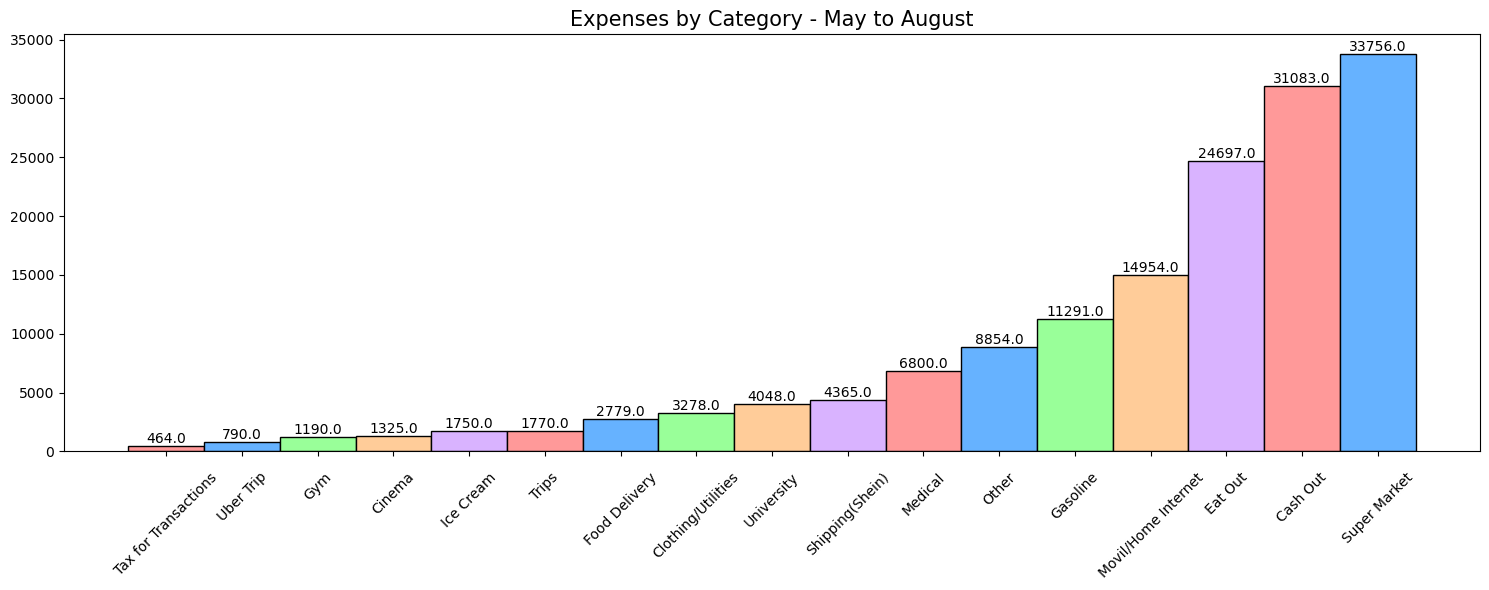

In [406]:
# Group values
cc_expenses_by_category = cc_expenses.groupby("Category")["Amount(DOP)"].sum().reset_index().sort_values("Amount(DOP)")

# Create bar chart
plt.figure(figsize=(15, 6))
bars = plt.bar(cc_expenses_by_category["Category"], cc_expenses_by_category["Amount(DOP)"], color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#D9B3FF'], width=1, edgecolor="black")
plt.title("Expenses by Category - May to August", fontsize=15)

# Customize ticks
plt.xticks(rotation=45)
plt.gca().xaxis.set_tick_params(pad=10)

# Add labels to bars
for bar, expense in zip(bars, cc_expenses_by_category["Amount(DOP)"].round()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{expense}", ha="center", va="bottom", fontsize=10)

# Show pie chart
plt.tight_layout()
plt.show()

#### The chart reaffirms our earlier observations: a significant portion of my expenses is attributed to outings, as evident from the categories displayed. To underscore this point, the chart notably highlights that four out of the top five categories correspond to expenses typically associated with going out: Gasoline, Eat Out, Cash Withdrawals (ATM), and Super Market.

#### Fun fact: I don't eat ice cream that much, but I still have spent 1,750 on it. That's 95% my wife, I can assure you.

## Question 5: Let's separate the categories, where did most of my money go to each month?

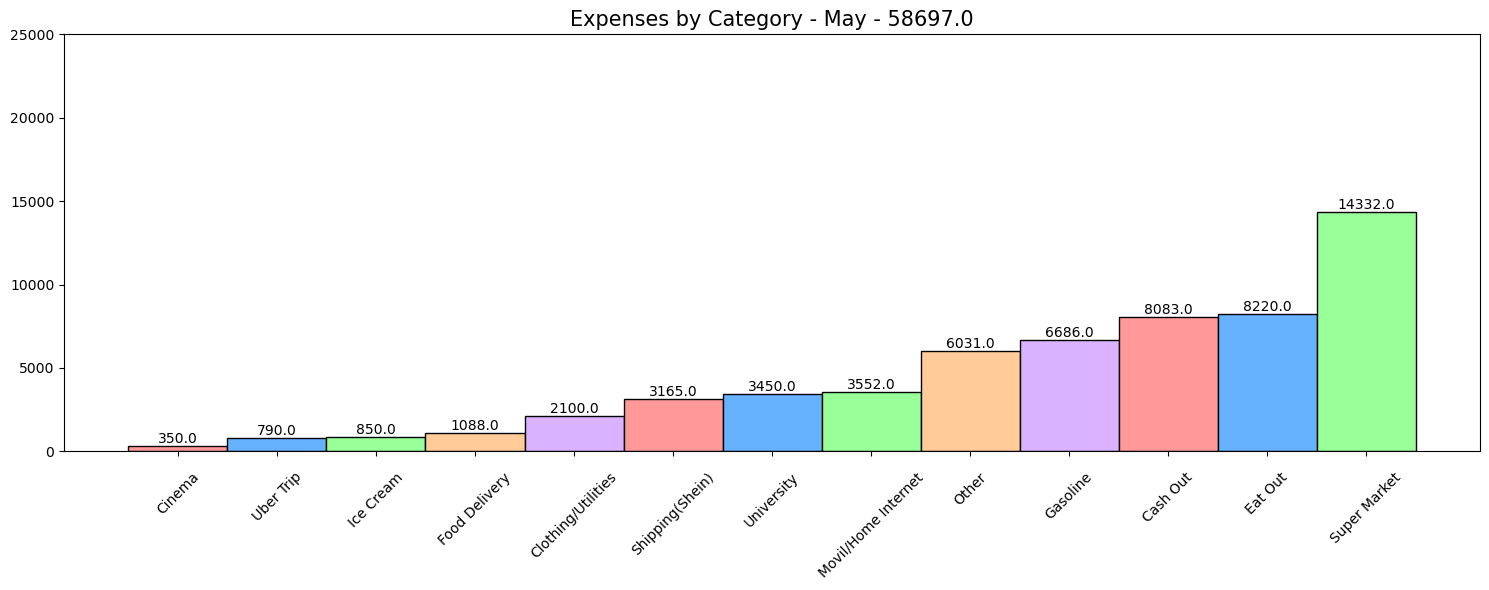

In [407]:
# Let's create a function so we don't copy paste the same code many times
def create_plot(month_name, month, day="31"):
    # Group values
    cc = cc_expenses[(cc_expenses["Date"] >= f"2023-{month}-01") & (cc_expenses["Date"] <= f"2023-{month}-{day}")]
    cc = cc.groupby("Category")["Amount(DOP)"].sum().reset_index().sort_values("Amount(DOP)")

    # Sum all the records
    total = cc["Amount(DOP)"].sum().round()

    # Create bar chart
    plt.figure(figsize=(15, 6))
    bars = plt.bar(cc["Category"], cc["Amount(DOP)"], color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#D9B3FF'], width=1, edgecolor="black")
    plt.title(f"Expenses by Category - {month_name} - {total}", fontsize=15)

    # Customize ticks
    plt.xticks(rotation=45)
    plt.ylim(0, 25000)
    plt.gca().xaxis.set_tick_params(pad=10)

    # Add labels to bars
    for bar, expense in zip(bars, cc["Amount(DOP)"].round()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{expense}", ha="center", va="bottom", fontsize=10)

    # Show bar chart
    plt.tight_layout()
    plt.show()

create_plot("May", "05")

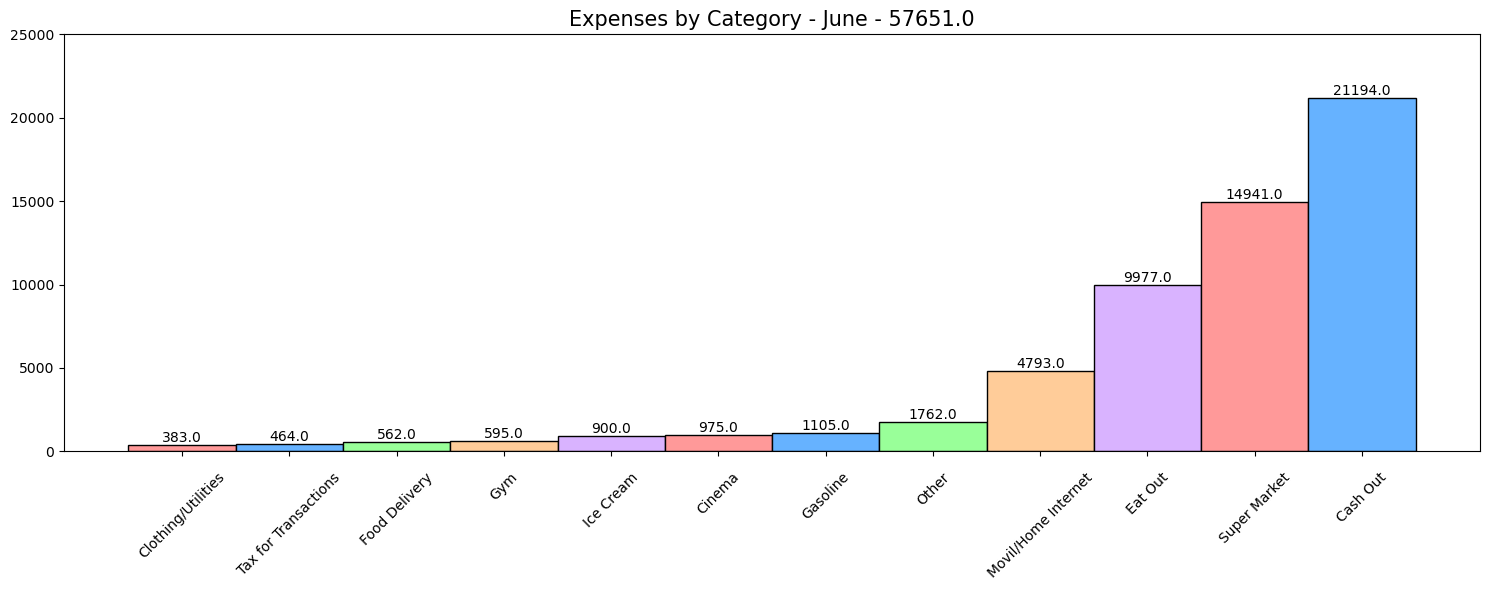

In [408]:
create_plot("June", "06", "30")

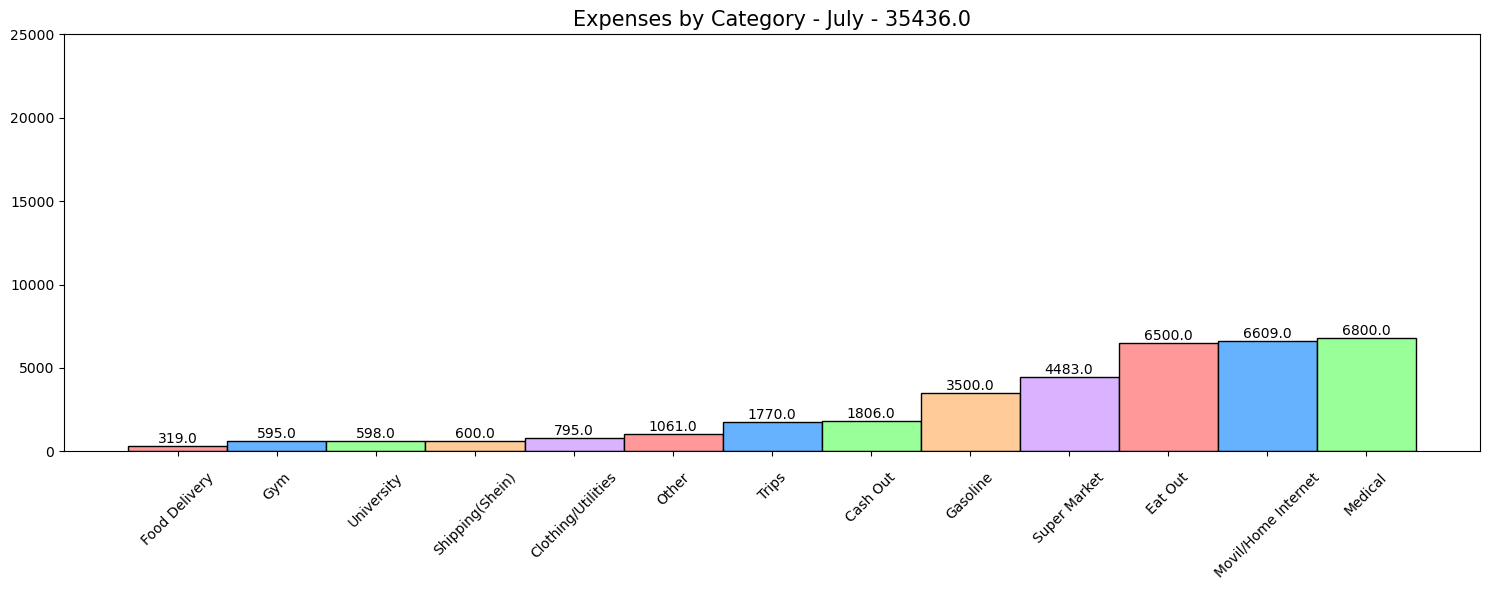

In [409]:
create_plot("July", "07")

## Question 7: Have there been any fluctuations in expenses over the course of the months?

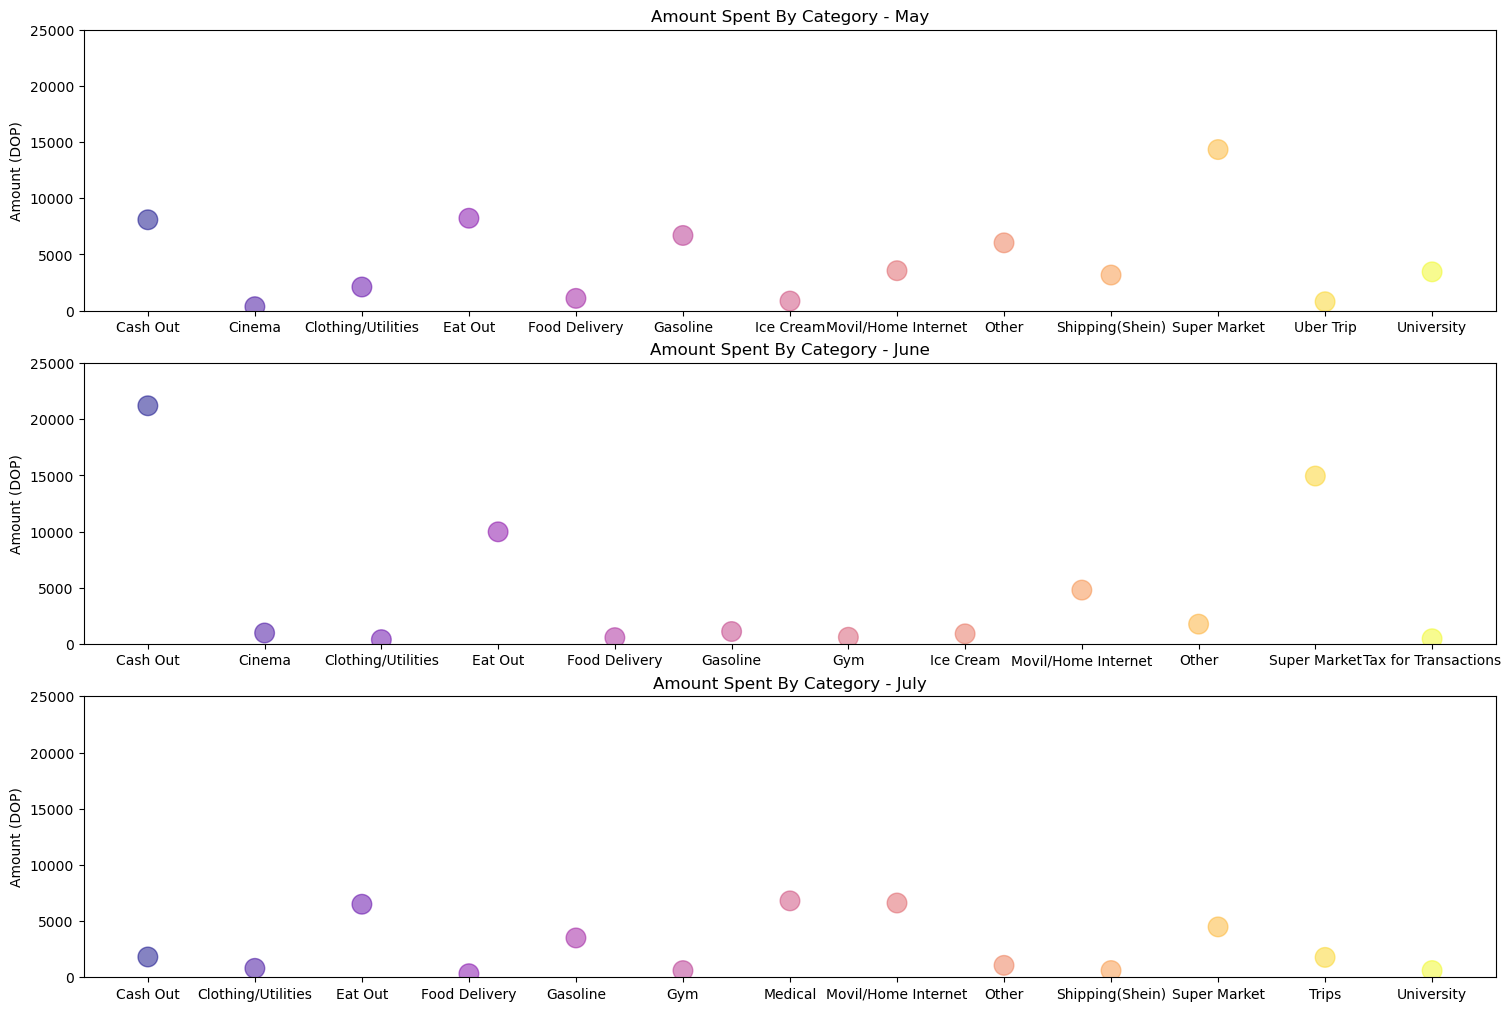

In [410]:
# Group values
may = cc_expenses[(cc_expenses["Date"] >= "2023-05-01") & (cc_expenses["Date"] <= "2023-05-31")].copy()
june = cc_expenses[(cc_expenses["Date"] >= "2023-06-01") & (cc_expenses["Date"] <= "2023-06-30")].copy()
july = cc_expenses[(cc_expenses["Date"] >= "2023-07-01") & (cc_expenses["Date"] <= "2023-07-31")].copy()

may_categories = may.groupby("Category")["Amount(DOP)"].sum().reset_index().sort_values("Category")
june_categories = june.groupby("Category")["Amount(DOP)"].sum().reset_index().sort_values("Category")
july_categories = july.groupby("Category")["Amount(DOP)"].sum().reset_index().sort_values("Category")

# Create subplot
fig, axs = plt.subplots(3, 1, figsize=(15, 10), layout="constrained")

for ax in axs:
    ax.set_ylabel("Amount (DOP)")
    ax.set_ylim(0, 25000)

# Create bubble plot

# First figure
colors = np.arange(len(may_categories))
ax = axs[0]
ax.scatter(may_categories["Category"], may_categories["Amount(DOP)"], s=200, c=colors, cmap="plasma", alpha=0.5)

# Set title 1
ax.set_title("Amount Spent By Category - May", fontsize="large")

# Second figure
colors = np.arange(len(june_categories))
ax = axs[1]
ax.scatter(june_categories["Category"], june_categories["Amount(DOP)"], s=200, c=colors, cmap="plasma", alpha=0.5)

# Set title 2
ax.set_title("Amount Spent By Category - June", fontsize="large")

# Third figure
colors = np.arange(len(july_categories))
ax = axs[2]
ax.scatter(july_categories["Category"], july_categories["Amount(DOP)"], s=200, c=colors, cmap="plasma", alpha=0.5)

# Set title 3
ax.set_title("Amount Spent By Category - July", fontsize="large")

plt.show()


#### Examining the chart reveals a shift in my spending patterns: I've reduced credit card withdrawals, cut down on dining out, and witnessed a gradual decline in food delivery expenses. Interestingly, super market expenditures have notably decreased, which is a positive sign. While Gas expenses increased in July compared to May, an alternate view suggests that I've been going out more frequently but managing to spend less, disrupting the typical correlation between going out and higher expenses.

# Summary

#### This analysis has provided me with some remarkable insights into my credit card expenditure trends. Notably, both May and June stood out as months with significant outflows, surpassing 58,000 DOP and 57,000 DOP respectively. It dawned on me that maintaining this spending trajectory would inevitably lead to financial challenges and potential debt. Fortunately, I intervened in time, curbing my expenses. July's spending, which totaled around 35,000 DOP, reflects a marked shift in the right direction – a noteworthy accomplishment on the path towards improved financial stability.

#### While I'm not ready to completely eliminate significant expenses, some financial obligations remain non-negotiable. Nevertheless, I'm dedicated to adopting a wiser approach to money management moving forward. My aim is to maximize the value of every peso and explore prudent ways to optimize my budget. This analysis has truly opened my eyes and is shaping my mindset towards making more informed financial decisions in the future.